# **Wine Quality Prediction Using Support Vector Machine** 

### Objective

The quality of a wine can be subjective and influenced by personal taste, but there are certain objective factors that can be used to evaluate the overall quality of a wine. By predicting the quality of a wine, winemakers can make informed decisions about blending, aging, and bottling, which can ultimately lead to a better product and higher customer satisfaction.

### Data Source

[Wine Quality Dataset](https://www.kaggle.com/datasets/yasserh/wine-quality-dataset)

### Import Library

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [14]:
from sklearn.preprocessing import StandardScaler

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [45]:
from sklearn.metrics import confusion_matrix,classification_report

In [49]:
from imblearn.over_sampling import RandomOverSampler

### Import Data

In [ ]:
data = pd.read_csv('WineQT.csv')

In [ ]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


### Describe Data

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


### Data Visualization

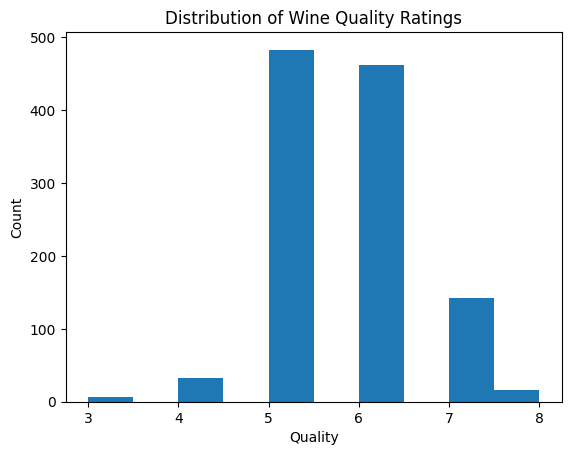

In [10]:
plt.hist(data['quality'])
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality Ratings')
plt.show()


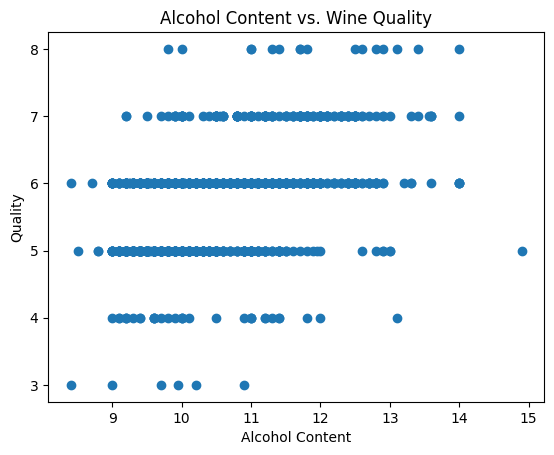

In [ ]:
plt.scatter(data['alcohol'], data['quality'])
plt.xlabel('Alcohol Content')
plt.ylabel('Quality')
plt.title('Alcohol Content vs. Wine Quality')
plt.show()

### Data Preprocessing and Define Target Variable (y) and Feature Variables (X)

In [18]:
data=data.drop('Id',axis=1)

In [28]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.iloc[:,:-1]) 
scaled_data

array([[-0.52157961,  0.93933222, -1.36502663, ...,  1.27069495,
        -0.57365783, -0.96338181],
       [-0.29259344,  1.94181282, -1.36502663, ..., -0.70892755,
         0.1308811 , -0.59360107],
       [-0.29259344,  1.27349242, -1.16156762, ..., -0.32577481,
        -0.04525363, -0.59360107],
       ...,
       [-1.20853813,  0.38239855, -0.9581086 , ...,  0.88754221,
        -0.45623467,  0.05351522],
       [-1.38027776,  0.10393172, -0.8563791 , ...,  1.33455374,
         0.60057372,  0.70063152],
       [-1.38027776,  0.6330187 , -0.75464959, ...,  1.65384769,
         0.30701583, -0.22382033]])

In [32]:
y=data.iloc[:,-1]
y

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

### Train Test Split

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_data,y,test_size=0.3,random_state=42)

### Modeling

In [39]:
svm = SVC(kernel='rbf')

In [40]:
svm.fit(X_train, y_train)

SVC()

In [41]:
y_pred = svm.predict(X_test)

### Prediction

In [48]:
y_pred

array([5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 7, 6, 5, 6, 6, 5, 6, 5, 5, 6, 6, 6,
       5, 7, 5, 5, 6, 6, 5, 6, 6, 6, 7, 6, 5, 5, 5, 6, 7, 6, 7, 5, 7, 5,
       5, 5, 6, 6, 5, 6, 7, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 7, 6, 5,
       7, 5, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 5,
       6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5, 6, 5, 5, 6, 6, 6, 7,
       6, 5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6, 5, 5,
       5, 6, 5, 5, 5, 5, 6, 6, 7, 5, 6, 5, 6, 5, 5, 5, 5, 5, 7, 5, 6, 5,
       6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5,
       7, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6,
       7, 6, 6, 6, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6, 5, 6, 6,
       6, 6, 5, 6, 5, 6, 5, 6, 6, 5, 7, 6, 5, 5, 6, 7, 5, 6, 5, 5, 6, 6,
       6, 5, 6, 6, 5, 6, 7, 5, 5, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 6, 7, 6,
       5, 5, 5, 6, 5, 6, 5, 7, 5, 6, 5, 6, 5, 6, 5, 5, 5, 7, 5, 5, 6, 7,
       5, 5, 6, 6, 6, 5, 7, 5, 6, 6, 6, 5, 6, 5, 5,

### Model Evaluation

In [42]:
accuracy = accuracy_score(y_test, y_pred)

In [43]:
print('Accuracy:', accuracy)

Accuracy: 0.6472303206997084


In [46]:
print(confusion_matrix(y_test,y_pred))

[[  0   6   3   0   0]
 [  0 109  33   1   0]
 [  0  43  97   6   0]
 [  0   5  20  16   0]
 [  0   0   4   0   0]]


In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.67      0.76      0.71       143
           6       0.62      0.66      0.64       146
           7       0.70      0.39      0.50        41
           8       0.00      0.00      0.00         4

    accuracy                           0.65       343
   macro avg       0.40      0.36      0.37       343
weighted avg       0.62      0.65      0.63       343



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Explanation

As the dataset is biased towards majority class 5 and 6 the accuracy of the prediction is low , so I use over sampling of minority class

### Oversampling

In [50]:
oversampler = RandomOverSampler(sampling_strategy='minority')

In [51]:
X_resampled, y_resampled = oversampler.fit_resample(data.iloc[:,:-1], y)

In [52]:
X_resampled_scaled = scaler.fit_transform(X_resampled)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled,y_resampled,test_size=0.3,random_state=42)

In [57]:
svm.fit(X_train, y_train)

SVC()

In [58]:
y_pred = svm.predict(X_test)

In [59]:
accuracy = accuracy_score(y_test, y_pred)

In [60]:
print(accuracy)

0.7366255144032922


As evident from the accuracy score , the accuracy of predictions increased from 64% to 74% due to oversampling of minority classes of the dataset 